In [3]:
!pip install matplotlib scikit-learn numpy




[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


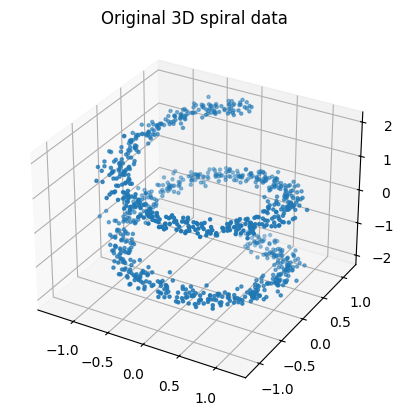

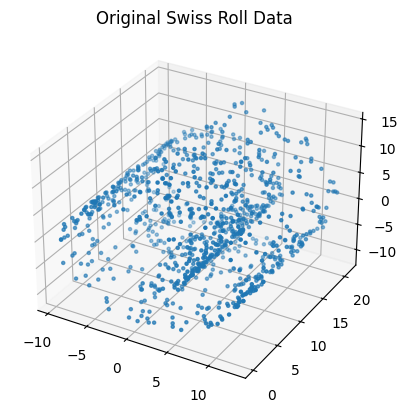

Applying PCA to Spiral Data...


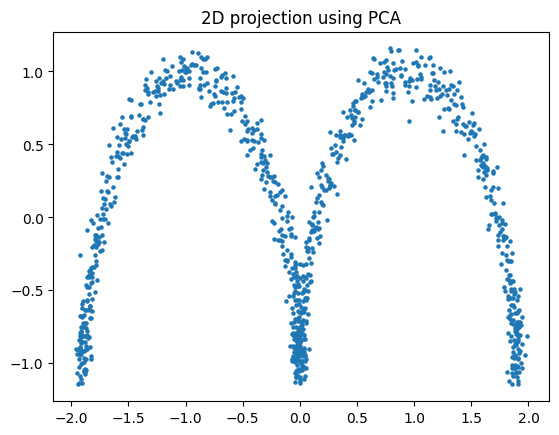

Applying PCA to Swiss Roll Data...


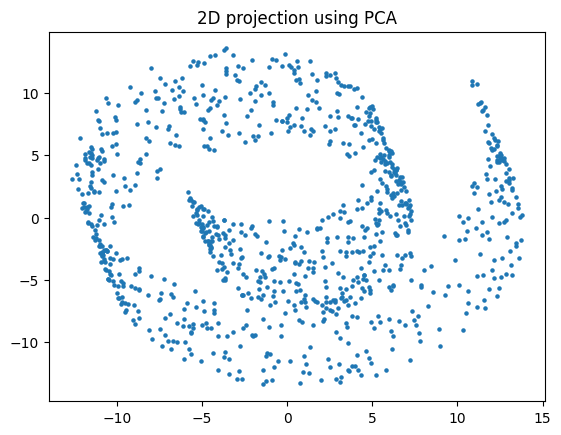

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# 1. Generiranje spirale
def generate_spiral(n_points=1000, noise=0.1):
    theta = np.linspace(0, 4 * np.pi, n_points)
    z = np.linspace(-2, 2, n_points)
    x = np.sin(theta) + noise * np.random.randn(n_points)
    y = np.cos(theta) + noise * np.random.randn(n_points)
    return np.column_stack((x, y, z))

# 2. Generiranje švicarskog svitka
def generate_swiss_roll(n_points=1000, noise=0.1):
    t = 1.5 * np.pi * (1 + 2 * np.random.rand(1, n_points))
    x = t * np.cos(t)
    y = 21 * np.random.rand(1, n_points)
    z = t * np.sin(t)
    return np.column_stack((x.flatten(), y.flatten(), z.flatten())) + noise * np.random.randn(n_points, 3)

# 3. Vizualizacija podataka prije PCA
def plot_3d(data, title="3D Data"):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], s=5)
    ax.set_title(title)
    plt.show()

# 4. Vizualizacija PCA projekcije u 2D
def plot_2d(data, title="2D Data after PCA"):
    plt.scatter(data[:, 0], data[:, 1], s=5)
    plt.title(title)
    plt.show()

# 5. Primjena PCA i projekcija u 2D
def apply_pca_and_plot(data):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    plot_2d(data_2d, title="2D projection using PCA")

# Glavni dio programa
if __name__ == "__main__":
    # Odaberi jedan od skupova podataka
    data_spiral = generate_spiral()
    data_swiss_roll = generate_swiss_roll()

    # Prikaz podataka prije PCA
    plot_3d(data_spiral, title="Original 3D spiral data")
    plot_3d(data_swiss_roll, title="Original Swiss Roll Data")

    # Primjena PCA i prikaz projekcije u 2D
    print("Applying PCA to Spiral Data...")
    apply_pca_and_plot(data_spiral)

    print("Applying PCA to Swiss Roll Data...")
    apply_pca_and_plot(data_swiss_roll)



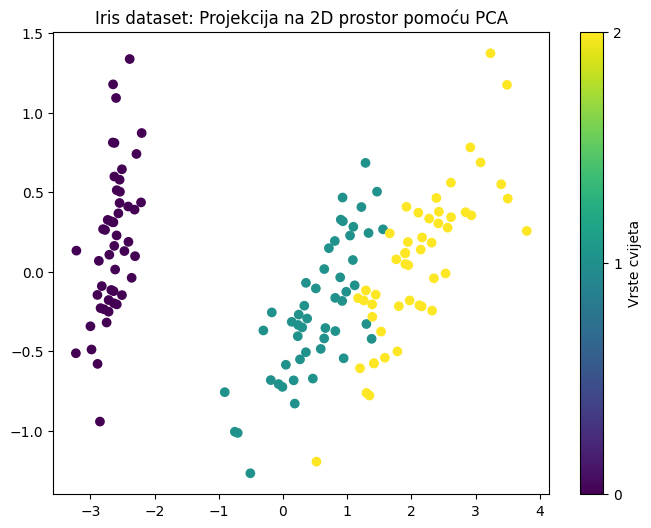

In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Učitavanje Iris dataset-a
iris = load_iris()
X = iris.data  # Značajke
y = iris.target  # Vrste cvijeta

# Primjena PCA za smanjenje na 2 dimenzije
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Vizualizacija rezultata
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('Iris dataset: Projekcija na 2D prostor pomoću PCA')
plt.colorbar(scatter, ticks=[0, 1, 2], label='Vrste cvijeta')
plt.show()


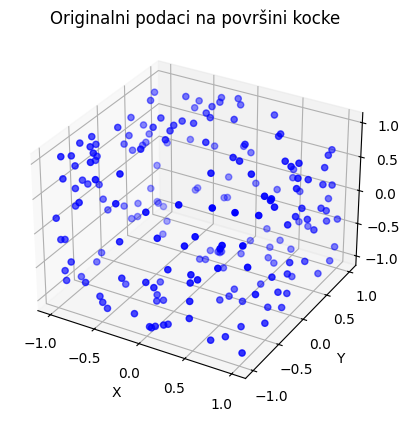

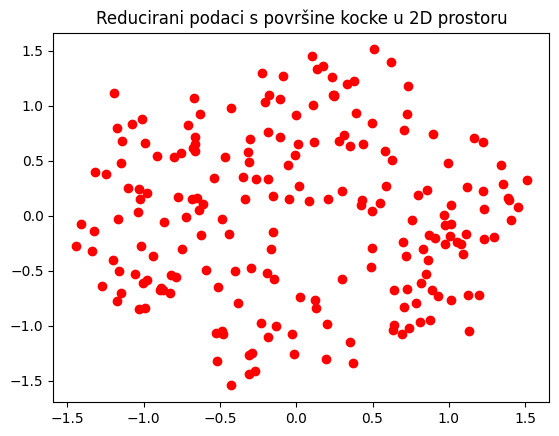

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd

# Funkcija za generiranje točaka na površini kocke
def generate_cube_points(n_points=1000):
    points = []
    for _ in range(n_points):
        axis = np.random.randint(3)  # Odabir jedne od tri osi (x, y ili z)
        coord = np.random.choice([-1, 1])  # Odabir strane kocke (+1 ili -1)
        point = np.random.uniform(-1, 1, 3)
        point[axis] = coord  # Jedna koordinata je uvijek +/- 1 (površina kocke)
        points.append(point)
    return np.array(points)

# Generiranje podataka na površini kocke
cube_points = generate_cube_points(200)

# Prikaz originalnih podataka u 3D prostoru
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cube_points[:, 0], cube_points[:, 1], cube_points[:, 2], c='b', marker='o')
ax.set_title("Originalni podaci na površini kocke")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# Primjena SVD-a na podatke
U, Sigma, Vt = svd(cube_points, full_matrices=False)

# Redukcija podataka na 2D prostor
cube_points_reduced = U[:, :2] @ np.diag(Sigma[:2])

# Prikaz reduciranih podataka u 2D prostoru
plt.scatter(cube_points_reduced[:, 0], cube_points_reduced[:, 1], c='r', marker='o')
plt.title("Reducirani podaci s površine kocke u 2D prostoru")

plt.show()


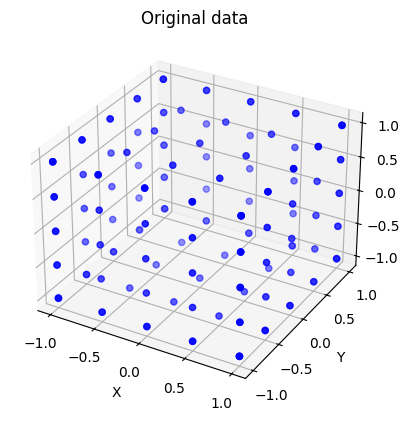

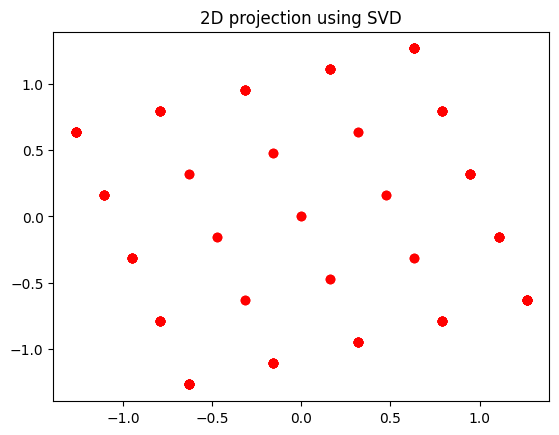

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd

# Funkcija za generiranje simetričnih točaka na površini kocke
def generate_symmetric_cube_points(n=5):
    """Generira ravnomjerno raspoređene točke po površini kocke."""
    x = np.linspace(-1, 1, n)
    points = []

    # Kreiraj točke za svaku od šest strana kocke
    for coord in [-1, 1]:
        for i in range(n):
            for j in range(n):
                # Strane paralelne s X osi
                points.append([coord, x[i], x[j]])
                # Strane paralelne s Y osi
                points.append([x[i], coord, x[j]])
                # Strane paralelne s Z osi
                points.append([x[i], x[j], coord])

    return np.array(points)

# Generiranje točaka na površini kocke
cube_points = generate_symmetric_cube_points(5)

# Prikaz originalnih podataka u 3D prostoru
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cube_points[:, 0], cube_points[:, 1], cube_points[:, 2], c='b', marker='o')
ax.set_title("Original data")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# Primjena SVD-a na podatke
U, Sigma, Vt = svd(cube_points, full_matrices=False)

# Redukcija podataka na 2D prostor
cube_points_reduced = U[:, :2] @ np.diag(Sigma[:2])

# Prikaz reduciranih podataka u 2D prostoru
plt.scatter(cube_points_reduced[:, 0], cube_points_reduced[:, 1], c='r', marker='o')
plt.title("2D projection using SVD")
plt.show()


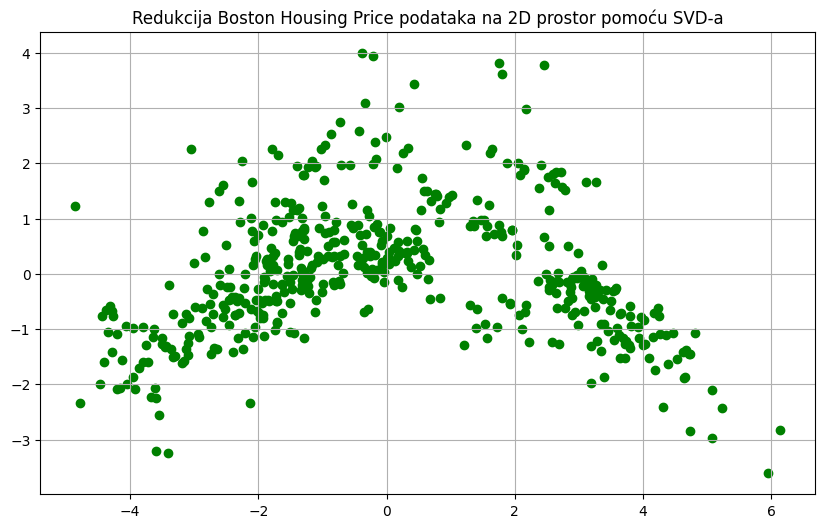

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Učitavanje podataka
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
data = pd.read_csv(url)

# Priprema podataka
X = data.drop(['medv'], axis=1)  # 'medv' je ciljna varijabla, ovdje je ne koristimo
X_scaled = StandardScaler().fit_transform(X)  # Standardizacija podataka

# Primjena SVD-a s redukcijom na 2 komponente
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_scaled)

# Vizualizacija
plt.figure(figsize=(10, 6))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c='green', marker='o')
plt.title('Redukcija Boston Housing Price podataka na 2D prostor pomoću SVD-a')
plt.grid(True)
plt.show()
